In [2]:
#This tutorial was created with a fresh install of the enviroment: conda create -n test python=3.10

In [3]:
pip install "git+https://github.com/lorenzkleiter/Neuronal-Batch-Correction.git"

  Cloning https://github.com/lorenzkleiter/Neuronal-Batch-Correction.git to c:\users\lklei\appdata\local\temp\pip-req-build-nxd_kykm
  Resolved https://github.com/lorenzkleiter/Neuronal-Batch-Correction.git to commit c4bfa10239bc61a48b038fc29f29f33006d3943d
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached scanpy-1.11.1-py3-none-any.whl.metadata (9.9 kB)
  Using cached scib-1.1.7-1-py3-none-any.whl.metadata (9.8 kB)
  Using cached anndata-0.11.4-py3-none-any.whl.metadata (9.3 kB)
  Using cached h5py-3.13.0-cp310-cp310-win_amd64.whl.metadata (2.5 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached legacy_api_wrap-1.4.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached networkx-3.

  Running command git clone --filter=blob:none --quiet https://github.com/lorenzkleiter/Neuronal-Batch-Correction.git 'C:\Users\lklei\AppData\Local\Temp\pip-req-build-nxd_kykm'


In [4]:
#import NBC and scanpy
import NBC
import scanpy as sc

In [5]:
#load dataset - has to be in the directory of tutorial.ipynb
adata = sc.read("small_atac_gene_activity.h5ad")
label_key = 'final_cell_label' #name of adata.obs for cell type annotation
batch_key= 'batchname_all' #name of adata.obs for batch annotation

In [6]:
# Integrate data
integrated = NBC.integration(adata, batch_key, label_key, 40, 128)

--Initilize Autoencoder--
--Train Autoencoder for mse_loss--
--Autoencode Data--
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step
--Initilize discriminator--
--Train discriminator--
--Autoencode Data--
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
--Initilize classifier--
--Train classifier--
--Update autoencoder weights - joint training--
Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40
--correct batch effect with trained autoencoder--
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: title={'center': 'final_cell_label'}, xlabel='UMAP1', ylabel='UMAP2'>

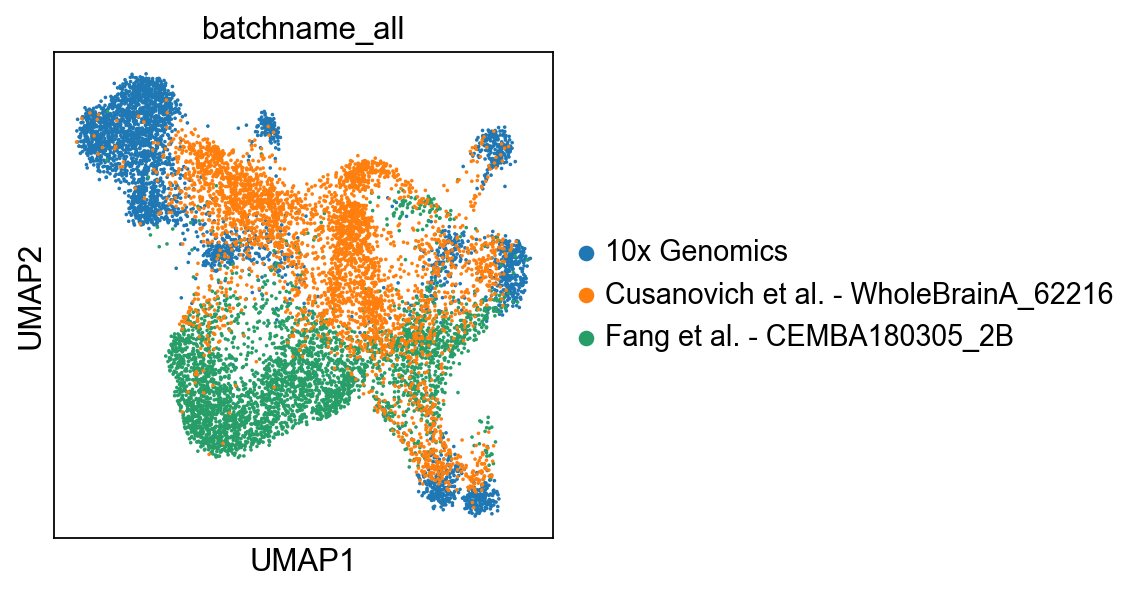

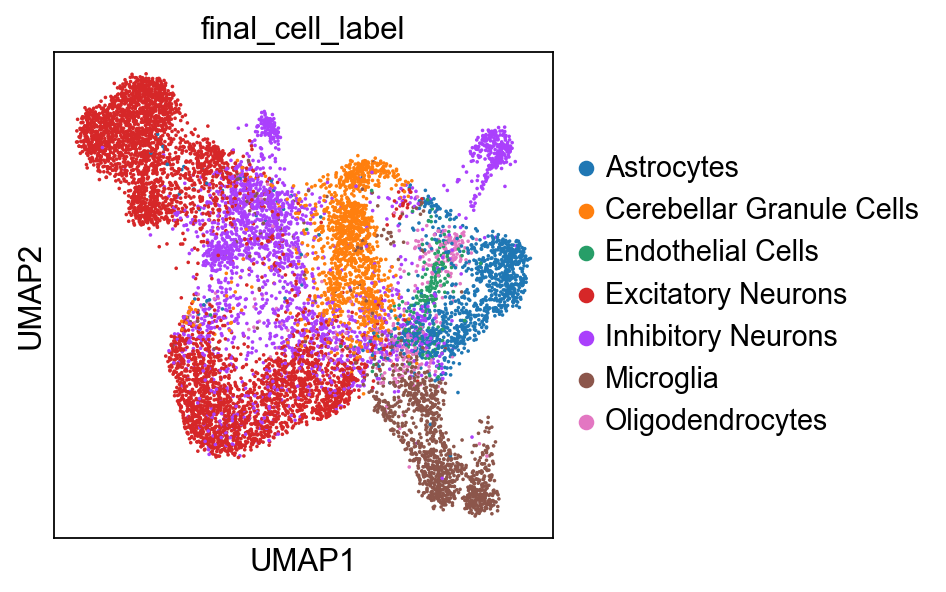

In [7]:
#--Create Umap projection of unintegrated results--
import matplotlib
#set options
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.set_figure_params(dpi_save=300)

#Unintegrated
sc.pp.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=25)
sc.tl.umap(adata, random_state=42)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=False, use_raw=False)
sc.pl.umap(adata, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=False, use_raw=False)


<Axes: title={'center': 'final_cell_label'}, xlabel='UMAP1', ylabel='UMAP2'>

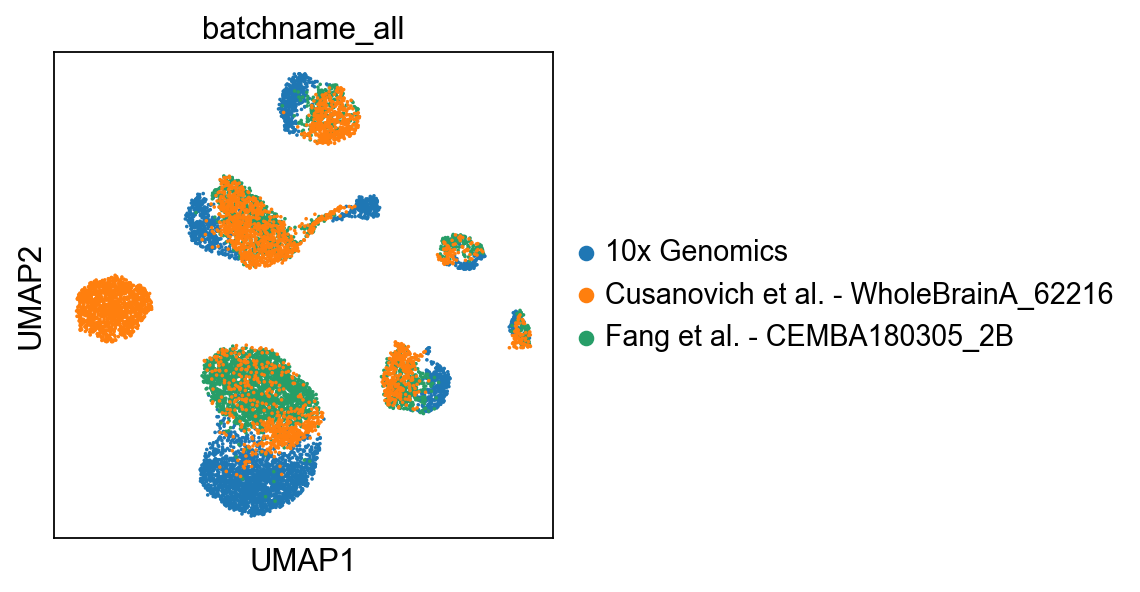

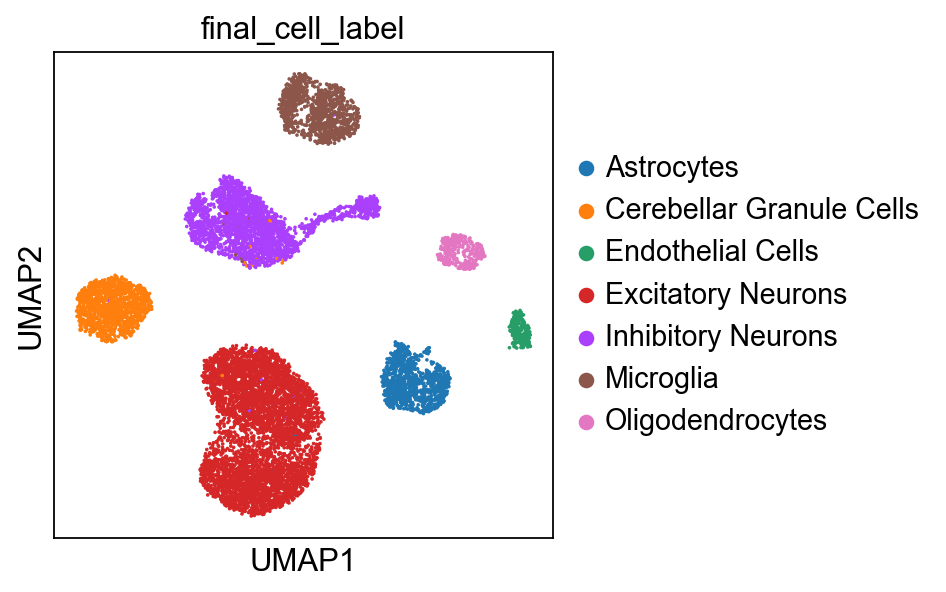

In [8]:
#--Create Umap projection of integrated results--
#Integrated
sc.pp.pca(integrated, svd_solver="arpack")
sc.pp.neighbors(integrated, n_neighbors=25)
sc.tl.umap(integrated, random_state=42)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[batch_key], show=False, use_raw=False)
sc.pl.umap(integrated, palette=matplotlib.rcParams["axes.prop_cycle"],
           color=[label_key], show=False, use_raw=False)